<a href="https://colab.research.google.com/github/rodespdi/PDA2526/blob/main/DCT_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargando la imagen 'camera' desde la biblioteca skimage...


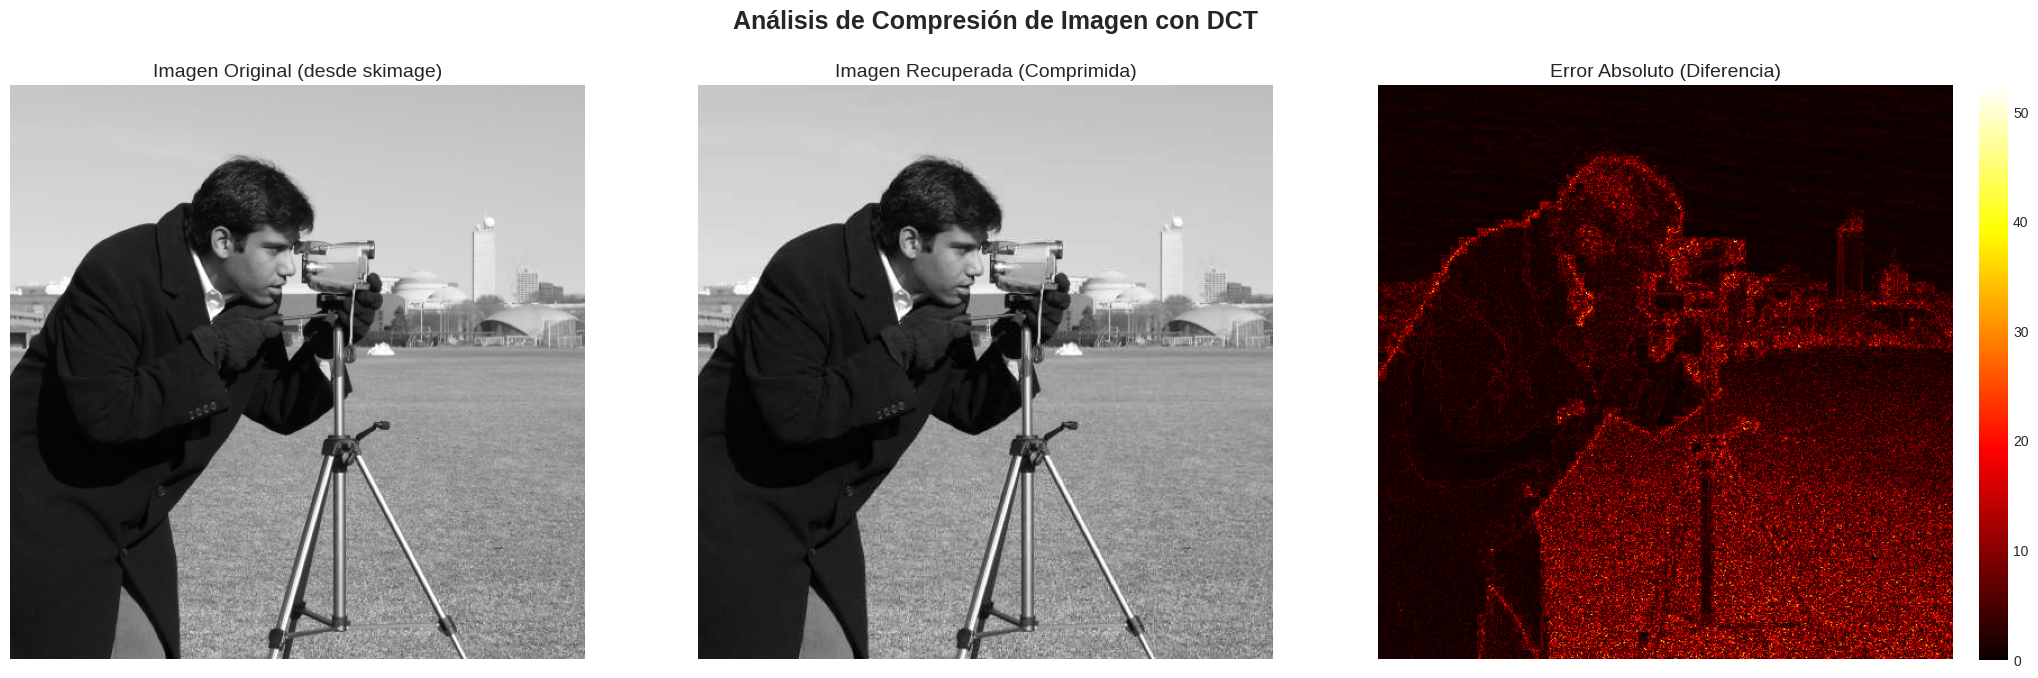


--- M칠tricas de Calidad de la Reconstrucci칩n ---
游늴 Error Cuadr치tico Medio (MSE): 35.89
   (Valores m치s bajos son mejores. Cero = perfecto)
游늳 칈ndice de Similitud Estructural (SSIM): 0.9142
   (Valores m치s cercanos a 1 son mejores)


In [10]:
#@title Compresi칩n DCT con Imagen Local

# Instala la biblioteca si es necesario
!pip install scikit-image -q

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data # Importamos el m칩dulo de datos
from skimage.metrics import mean_squared_error, structural_similarity

# --- 1. Cargar la imagen desde la biblioteca scikit-image ---
# La funci칩n fue renombrada de 'cameraman()' a 'camera()' en versiones nuevas.
print("Cargando la imagen 'camera' desde la biblioteca skimage...")
img_gray = data.camera() # <--- CORRECCI칍N AQU칈
img_original_float = img_gray.astype(float)

# --- 2. Matriz de Cuantificaci칩n Est치ndar de JPEG ---
Q_matrix = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61], [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56], [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77], [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101], [72, 92, 95, 98, 112, 100, 103, 99]
])

# --- 3. Proceso de Compresi칩n y Reconstrucci칩n por Bloques ---
block_size = 8
height, width = img_original_float.shape
img_reconstructed = np.zeros_like(img_original_float)

for r in range(0, height, block_size):
    for c in range(0, width, block_size):
        block = img_original_float[r:r+block_size, c:c+block_size]
        dct_block = cv2.dct(block)
        quantized_block = np.round(dct_block / Q_matrix)
        dequantized_block = quantized_block * Q_matrix
        reconstructed_block = cv2.idct(dequantized_block)
        img_reconstructed[r:r+block_size, c:c+block_size] = reconstructed_block

# --- 4. C치lculo de las m칠tricas de error ---
mse = mean_squared_error(img_original_float, img_reconstructed)
ssim = structural_similarity(img_original_float, img_reconstructed, data_range=255)

# --- 5. Visualizaci칩n de Resultados ---
error_image = np.abs(img_original_float - img_reconstructed)

plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

# Imagen Original
axs[0].imshow(img_original_float, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Imagen Original (desde skimage)', fontsize=14)
axs[0].axis('off')

# Imagen Comprimida/Recuperada
axs[1].imshow(img_reconstructed, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Imagen Recuperada (Comprimida)', fontsize=14)
axs[1].axis('off')

# Imagen de Error
im = axs[2].imshow(error_image, cmap='hot', vmin=0)
axs[2].set_title('Error Absoluto (Diferencia)', fontsize=14)
axs[2].axis('off')
fig.colorbar(im, ax=axs[2], orientation='vertical', fraction=0.046, pad=0.04)

plt.suptitle('An치lisis de Compresi칩n de Imagen con DCT', fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Imprimir las m칠tricas de calidad ---
print("\n--- M칠tricas de Calidad de la Reconstrucci칩n ---")
print(f"游늴 Error Cuadr치tico Medio (MSE): {mse:.2f}")
print("   (Valores m치s bajos son mejores. Cero = perfecto)")
print(f"游늳 칈ndice de Similitud Estructural (SSIM): {ssim:.4f}")
print("   (Valores m치s cercanos a 1 son mejores)")

Claro, aqu칤 tienes un resumen textual de todo el proceso, sin incluir el c칩digo.

### **Resumen del Proceso de Compresi칩n de Im치genes con DCT**

El programa demuestra c칩mo funciona la compresi칩n de im치genes, similar a la del formato JPEG, siguiendo varios pasos clave:

---
#### **1. Preparaci칩n e Importaci칩n**

Primero, el script se asegura de tener todas las herramientas necesarias. Importa bibliotecas de Python especializadas: una para **c치lculos num칠ricos** (NumPy), otra para **procesamiento de im치genes** (OpenCV y Scikit-image), y una 칰ltima para **crear gr치ficos** (Matplotlib).

---
#### **2. Carga de la Imagen**

En lugar de depender de un enlace de internet que podr칤a romperse, el programa carga una **imagen de prueba est치ndar ("camera")** que viene incluida dentro de la biblioteca `scikit-image`. Esta imagen, que est치 en escala de grises, se convierte a un formato num칠rico de alta precisi칩n (n칰meros flotantes) para poder realizar los c치lculos matem치ticos correctamente.

---
#### **3. El Proceso de Compresi칩n y Reconstrucci칩n**

El n칰cleo del programa no trabaja con la imagen completa de una vez, sino que la recorre **dividi칠ndola en peque침os bloques de 8x8 p칤xeles**. Para cada uno de estos bloques, realiza el siguiente ciclo:

1.  **Transformaci칩n (DCT)**: Aplica la **Transformada de Coseno Discreta (DCT)**, una operaci칩n matem치tica que convierte los 64 valores de p칤xeles del bloque en 64 coeficientes de "frecuencia". Los coeficientes de baja frecuencia (que representan las 치reas de color suave) son los m치s importantes para nuestra vista, mientras que los de alta frecuencia (los detalles finos y texturas) lo son menos.

2.  **Cuantificaci칩n (La Compresi칩n Real)**: Este es el paso donde se pierde informaci칩n para ahorrar espacio. El script divide los 64 coeficientes de frecuencia por una **matriz de cuantificaci칩n** predefinida. Esta matriz tiene n칰meros peque침os para las bajas frecuencias (conservando su calidad) y n칰meros muy grandes para las altas frecuencias. Al dividir y redondear, muchos de los coeficientes de alta frecuencia (los detalles menos importantes) se convierten en cero, logrando la compresi칩n.

3.  **Reconstrucci칩n (Proceso Inverso)**: Para poder ver el resultado, el programa invierte el proceso. Multiplica los coeficientes comprimidos por la misma matriz de cuantificaci칩n y luego aplica la **DCT Inversa** para convertir los coeficientes de frecuencia de nuevo en valores de p칤xeles.

Una vez que se ha procesado cada bloque, se unen todos para formar la **imagen final reconstruida**.

---
#### **4. Medici칩n de la Calidad**

Tras reconstruir la imagen, el script la compara con la original para medir cu치nta calidad se perdi칩. Lo hace de dos formas:

-   **Error Cuadr치tico Medio (MSE)**: Una medida puramente matem치tica del error. Un n칰mero m치s bajo es mejor.
-   **칈ndice de Similitud Estructural (SSIM)**: Una m칠trica m치s avanzada que intenta imitar c칩mo percibe un humano la similitud entre dos im치genes. Un valor cercano a 1 indica una reconstrucci칩n casi perfecta.

---
#### **5. Visualizaci칩n de los Resultados**

Finalmente, el programa muestra tres im치genes una al lado de la otra:

1.  **La imagen original**.
2.  **La imagen reconstruida** despu칠s de la compresi칩n.
3.  **Una "imagen de error"**, que muestra en un mapa de calor d칩nde se encuentran las mayores diferencias entre la original y la reconstruida. Las zonas m치s brillantes en esta imagen (generalmente los bordes y texturas) son donde m치s informaci칩n se ha perdido.

Adem치s, imprime en la consola los valores num칠ricos del MSE y el SSIM para dar una evaluaci칩n cuantitativa del resultado.